<a href="https://colab.research.google.com/github/Shashwat-Manglam-Jain/Blog-project-/blob/main/cat_vs_dog_convolution_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [14]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten ,BatchNormalization ,Dropout

In [8]:
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    batch_size=32,
    image_size=(256, 256))

validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    batch_size=32,
    image_size=(256, 256))

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [9]:
#normalise
def process(image,label):
  image=tf.cast(image/265. ,tf.float32)
  return image,label
train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [18]:
#create cnn model
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [20]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 69s 104ms/step - loss: 1.5825 - accuracy: 0.5771 - val_loss: 0.7108 - val_accuracy: 0.5894
Epoch 2/10
625/625 [==============================] - 75s 119ms/step - loss: 0.6306 - accuracy: 0.6454 - val_loss: 0.6160 - val_accuracy: 0.6408
Epoch 3/10
625/625 [==============================] - 67s 106ms/step - loss: 0.5402 - accuracy: 0.7266 - val_loss: 0.5461 - val_accuracy: 0.7366
Epoch 4/10
625/625 [==============================] - 74s 119ms/step - loss: 0.4638 - accuracy: 0.7770 - val_loss: 0.5540 - val_accuracy: 0.6948
Epoch 5/10
625/625 [==============================] - 72s 114ms/step - loss: 0.4096 - accuracy: 0.8144 - val_loss: 0.4781 - val_accuracy: 0.7658
Epoch 6/10
625/625 [==============================] - 73s 116ms/step - loss: 0.3325 - accuracy: 0.8543 - val_loss: 0.4916 - val_accuracy: 0.8008
Epoch 7/10
625/625 [==============================] - 68s 108ms/step - loss: 0.2706 - accuracy: 0.8870 - val_loss: 0.8872 - val_ac

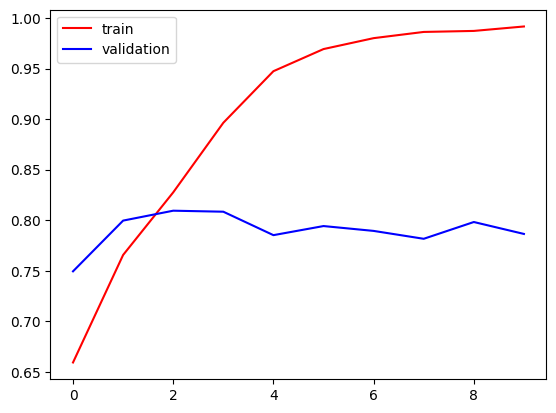

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')

plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

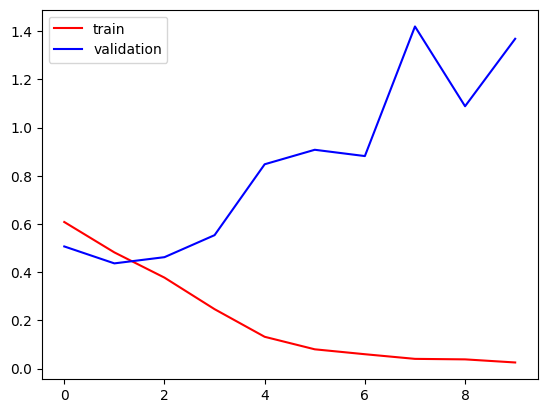

In [17]:
plt.plot(history.history['loss'],color='red',label='train')

plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [114]:
import cv2

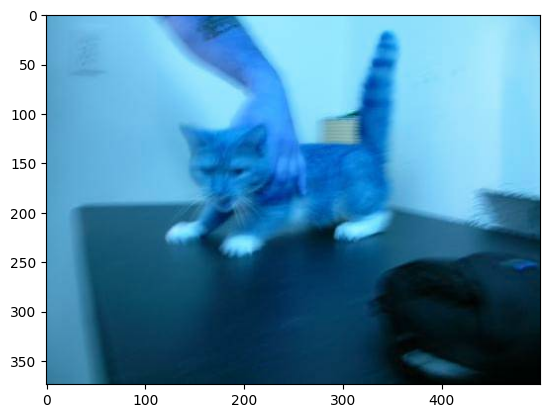

In [102]:
test_img=cv2.imread('/content/train/cats/cat.1000.jpg')
plt.imshow(test_img)
test_img.shape
test_img=cv2.resize(test_img,(256,256))
test_input=test_img.reshape(1,256,256,3)
predict=model.predict(test_input)
print(predict)
if predict[0]==1:
  print("Dog Image")
else:
  print("cat Image")

In [120]:
import pickle


In [121]:
filename='cat_vs_dog_conv2d_model.sav'
pickle.dump(model,open(filename,'wb'))

In [125]:
loder_model=pickle.load(open('cat_vs_dog_conv2d_model.sav','rb'))

1/1 [==============================] - 0s 112ms/step
[[0.]]
cat Image


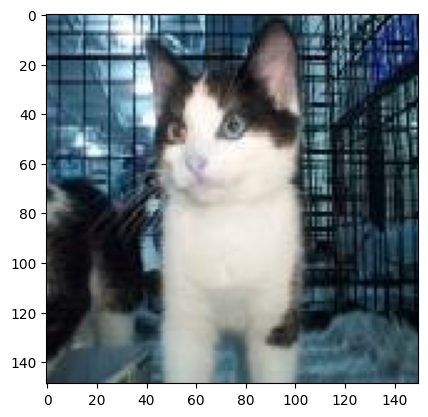

In [126]:
test_img=cv2.imread('/content/train/cats/cat.1000.jpg')
plt.imshow(test_img)
test_img.shape
test_img=cv2.resize(test_img,(256,256))
test_input=test_img.reshape(1,256,256,3)
predict=loder_model.predict(test_input)
print(predict)
if predict[0]==1:
  print("Dog Image")
else:
  print("cat Image")